In [208]:
import matplotlib.pyplot as plt
import numpy as np

from modules import dataset
from modules import detrend

from scipy.stats import pearsonr

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### specify the FAO dataset you want to retrieve

In [181]:
# global dataset vars
path = "data/Production_Crops_Livestock_E_All_Data.csv"
country = "spain"
crop = "wheat"
quantity = "yield"
accuracy = "actual"

In [183]:
data = dataset.Dataset(path, country, crop, quantity, accuracy)
df = data.dataset
df.head()

,year,value,flag,unit,quantity
0,1991.0,2.46,A,t/ha,yield
1,1992.0,1.94,A,t/ha,yield
2,1993.0,2.45,A,t/ha,yield
3,1994.0,2.18,A,t/ha,yield
4,1995.0,1.48,A,t/ha,yield


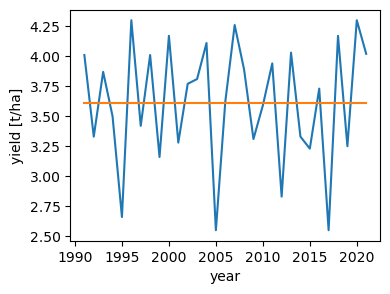

In [207]:
detrend._plot_linear_trend(detrend._linear_detrending(df), "value_detrended", (4, 3))

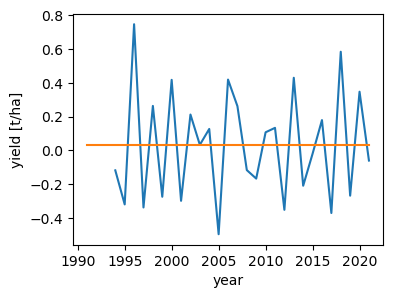

In [206]:
detrend._plot_linear_trend(detrend._moving_average_anomalies(df), "value_anomaly", (4, 3))

In [221]:
linear_detrend = detrend._linear_detrending(df)
yield_anomaly = detrend._moving_average_anomalies(df)

both_approaches = yield_anomaly.merge(linear_detrend, on ="year", how="inner").dropna()

pearsonr(both_approaches["value_detrended"], both_approaches["value_anomaly"])[0].round(2)

0.84